In [1]:
!pip install pillow


In [2]:
!pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=8756ad1d1480015fadc8dc722b485e0fef8e3a18e1dd1401dadf46839e4448ad
  Stored in directory: c:\users\dlwog\appdata\local\pip\cache\wheels\ed\8a\c6\40c7ec06c2dd3df636832537238128a1471bf9c1b6a3a9bf40
Successfully built pytesseract


In [11]:
!pip install opencv_python

In [25]:
import cv2
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [29]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract' 
img = Image.open('./data/Aksk.png') 
print(pytesseract.image_to_string(img,lang='kor'))


외계인의  |사
살아보려




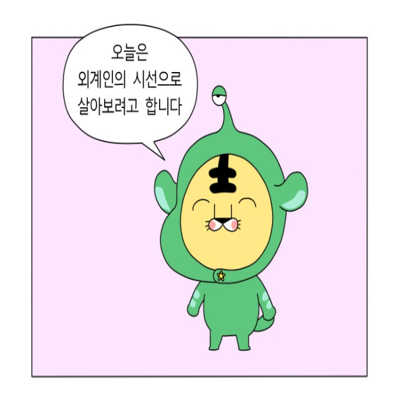

오늘은

외계인의 시선으로

살아보려고 합니다




In [42]:
from PIL import Image
from pytesseract import *
filename = './data/Aksk.png'
image = Image.open(filename).resize((400,400))
text = pytesseract.image_to_string(image, lang='kor')
display(image)
print(text)

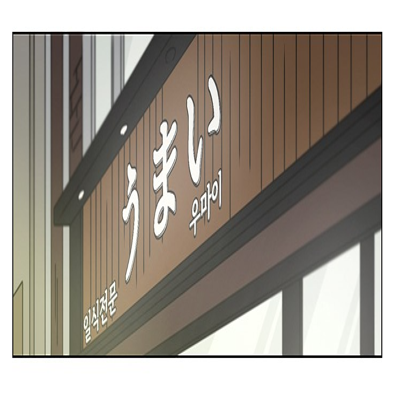

In [43]:
from PIL import Image
from pytesseract import *
filename = './data/dnak.png'
image = Image.open(filename).resize((400,400))
text = pytesseract.image_to_string(image, lang='kor')
display(image)
print(text)

In [2]:
!pip install easyocr

In [3]:
!pip install opencv-python==4.5.4.60


  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62


In [4]:
import easyocr

reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext('./data/Aksk.png')

print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[199, 51], [275, 51], [275, 87], [199, 87]], '오늘은', 0.6519809365272522), ([[136, 84], [335, 84], [335, 123], [136, 123]], '외계인의 시선으로', 0.9751343592493442), ([[137, 121], [339, 121], [339, 157], [137, 157]], '살아보려고 합니다', 0.5836618231492038)]


In [19]:
request_headers={
    'Referer':'https://comic.naver.com/webtoon/list?titleId=784255&weekday=wed'
}

In [20]:
response = requests.get(image_url, headers = request_headers)

In [24]:
from bs4 import BeautifulSoup
import requests
import os
url = "https://comic.naver.com/webtoon/list.nhn?titleId=703852&page=1" 

# 크롤링 우회
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}
html = requests.get(url, headers = headers)
result = BeautifulSoup(html.content, "html.parser")

webtoonName = result.find("span", {"class", "wrt_nm"}).parent.get_text().strip().split('\n')
# webtoonName = ['바른연애 길잡이', '\t\t\t\t\t\t\t남수']

In [25]:
cwd = os.getcwd()
files = os.listdir(cwd)
# 현재 directory 위치
print(cwd, end='\n\n')

# 크롤링한 이미지를 저장할 폴더를 만듦
if os.path.isdir(os.path.join(cwd,  webtoonName[0])) == False: 
    os.mkdir(webtoonName[0])
   
print(webtoonName[0] + " folder created successfully!")
os.chdir(os.path.join(cwd,  webtoonName[0])) 

C:\cakd5\workspace\programming\crawling\일렉시드\176화\일렉시드\176화\일렉시드\176화\일렉시드\176화\일렉시드\176화\일렉시드\176화\일렉시드\일렉시드

바른연애 길잡이 folder created successfully!


In [26]:
title = result.findAll("td", {"class", "title"})

for t in title:
    
    # 회차별로 directory를 만든 후 해당 directory로 이동
    os.mkdir((t.text).strip()) 
    os.chdir(os.getcwd() + "//" + (t.text).strip()) 

    # 각 회차별 html 소스 가져오기
    url ="https://comic.naver.com" + t.a['href']
    html2 = requests.get(url, headers = headers) 
    result2 = BeautifulSoup(html2.content, "html.parser") 

    # webtoon image 가져오기
    webtoonImg = result2.find("div", {"class", "wt_viewer"}).findAll("img")
    num = 1 #image_name
    
    for i in webtoonImg:
        saveName = os.getcwd() + "//" + str(num) + ".jpg"
        with open(saveName, "wb") as file:
            src = requests.get(i['src'], headers = headers) 
            file.write(src.content) #
        num += 1

    os.chdir("..")

    # 한 회차 이미지 저장 완료!
    print((t.text).strip() + "   saved completely!") 

12   saved completely!
11   saved completely!
10   saved completely!
09   saved completely!
08   saved completely!
07   saved completely!
06   saved completely!
05   saved completely!
04   saved completely!
03   saved completely!


In [33]:
from bs4 import BeautifulSoup 
import urllib.request
import os, re
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)
html = urllib.request.urlopen("https://comic.naver.com/webtoon/list?titleId=758150&weekday=sun")
soup = BeautifulSoup(html.read(),"html.parser") #웹 페이지 파싱
html.close() #닫기

comic_title = soup.find("div", {"class", "detail"}).find("h2").text.split()[0] #만화 이름

os.chdir("C:\cakd5\workspace\programming\crawling") #다운로드 폴더
dir = comic_title
if not os.path.isdir(dir):
    os.mkdir(dir)
    print(comic_title+" 디렉토리 생성")
else:
    print("같은 이름의 디렉토리가 이미 있음")
os.chdir("C:\cakd5\workspace\programming\crawling"+dir) #다운로드 받을 폴더로 이동


comic_list=[]
tmp_list=soup.select('td>a') #<td>안에 <a>태그에
for i in tmp_list:
    if('https' in i['href']): #다음 화를 미리 만나보세요 링크 패스
        continue
    comic_list.append(i['href'])
comic_list = sorted(set(comic_list))

for i in range(len(comic_list)):
    ep_url = url="https://comic.naver.com"+comic_list[i]
    html = urllib.request.urlopen(ep_url)
    soup2 = BeautifulSoup(html.read(),"html.parser")

    ep = soup2.find('h3') #<h3>이름</h3>
    ep_title = re.sub('<.*?>', '', str(ep)) #이름만 남게
    
    if not os.path.isdir(ep_title):
        os.mkdir(ep_title)
        print(ep_title+" 디렉토리 생성")
    else:
        print("같은 이름의 디렉토리가 이미 있음")
    os.chdir(ep_title) #이동

    img_div = soup2.find("div", {"class", "wt_viewer"})
    img_all = img_div.findAll("img")

    num = 1
    for j in img_all:
        img_path = j.get("src")
        img_num = str(num)+".png"
        urllib.request.urlretrieve(img_path, img_num)
        num = num + 1
    print(ep_title+" 다운로드 완료")
    os.chdir("..") #상위 폴더로

print("다운로드 끝")


입학용병 디렉토리 생성


FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'C:\\cakd5\\workspace\\programming\\crawling입학용병'

In [3]:
import easyocr
import cv2

reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext('C:\cakd5\workspace\programming\crawling\data12/5.jpg')


for j in range(len(result)):
    print(result[j][1])


Using CPU. Note: This module is much faster with a GPU.


착각이 왜는 것 같은데..


In [40]:
import easyocr
import cv2

reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext('C:\cakd5\workspace\programming\crawling\data/3.png')


for j in range(len(result)):
    print(result[j][1])
    
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 그레이 스케일로 영상 읽기
img = cv2.imread('./buildup/71/3.png', cv2.IMREAD_GRAYSCALE)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)


Using CPU. Note: This module is much faster with a GPU.


거구의
센터백
박지우가
코너칙
이후에 아직
복귀하지
못햇어!!
